# Epilepsy Comorbidity Analysis using SCAIView

This notebook contains the Quantification of gene overlap comparing Epilepsy with other disorders using text mining presented in Hoyt and Domingo-Fernandez *et. al*, 2018.

In [1]:
import csv
import os
import sys
import time

from operator import itemgetter

from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn2
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
print(sys.version)

3.6.4 (default, Mar 22 2018, 13:54:22) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]


In [4]:
print(time.asctime())

Thu Apr 19 16:11:10 2018


In [5]:
current_path = os.getcwd() # Notebook abs path

# Queries

The following two sets of queries were used in this analysis:

## Reference Queries

- `[MeSH Disease:"Epilepsy"]`
- `[MeSH Disease:"Alzheimer Disease"]`
- `[MeSH Disease:"Tuberculosis"]`
- `[MeSH Disease:"Parkinson Disease"]`
- `[MeSH Disease:"Dementia"]`
- `[MeSH Disease:"Migraine Disorders"]`
- `[MeSH Disease:"Diabetes Mellitus"]`
- `[MeSH Disease:"Colonic Neoplasms"]`
- `[MeSH Disease:"Pulmonary Disease Chronic Obstructive"]`
- `[MeSH Disease:"Peptic Ulcer"]`
- `[MeSH Disease:"Anxiety Disorders"]`
- `[MeSH Disease:"Urinary Incontinence"]`
- `[MeSH Disease:"Cataract"]`
- `[MeSH Disease:"Hypertension"]`
- `[MeSH Disease:"Arthritis"]`

## Queries used for calculating pleitropy rates

- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Alzheimer Disease"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Parkinson Disease"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Dementia"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Migraine Disorders"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Diabetes Mellitus"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Colonic Neoplasms"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Pulmonary Disease Chronic Obstructive"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Anxiety Disorders"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Urinary Incontinence"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Cataract"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Hypertension"]`
- `[MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Arthritis"]`

The queries were retrieved using SCAIView version 1.7.3
Corresponding to the indexing of MEDLINE on 2016-07-14T13:50:07.797575Z.

*Note that the reference queries might take time since thousand of articles need to be analyzed.

#### Notebook results

In [6]:
pd.read_csv(os.path.join(current_path, 'results', 'gene_overlap_results.tsv'), sep='\t')

,Condition,MeSH ID,Reference Query,Associated documents,Disease-associated genes,Comorbidity-associated genes,Normalized pleitropy rate (%)
0,Epilepsy,D004827,"[MeSH Disease:""Epilepsy""]",192245,2901,-,-
1,Alzheimer's Disease,D000544,"[MeSH Disease:""Alzheimer Disease""]",109495,4968,396,13.65
2,Migraine,D008881,"[MeSH Disease:""Migraine Disorders""]",30928,1230,306,10.54
3,Parkinson's Disease,D010300,"[MeSH Disease:""Parkinson Disease""]",79103,3646,258,8.89
4,Hypertension,D006973,"[MeSH Disease:""Hypertension""]",391190,5574,252,8.68
5,Dementia,D003704,"[MeSH Disease:""Dementia""]",183802,5833,220,7.58
6,Diabetes Mellitus,D003920,"[MeSH Disease:""Diabetes Mellitus""]",394411,6661,184,6.34
7,Anxiety,D001007,"[MeSH Disease:""Anxiety Disorders""]",84138,1782,124,4.27
8,Arthritis,D001168,"[MeSH Disease:""Arthritis""]",259327,5367,122,4.2
9,Cataract,D002386,"[MeSH Disease:""Cataract""]",52150,2238,119,4.1


#### Table 1. Results of the Epilepsy Comorbidity Analysis using SCAIView. 

Description of each column:

Column 1. Disease.

Column 2. Reference query for the disease.

Column 3. Number of documents retrieved using the disease reference query.

Column 4. Total number of genes found in the corpus retrieved with the reference query for the disease.

Column 5. Number of genes with a relative entropy greater than 0 retrieved from a query containing the disease of interest and epilepsy. An example for diabetes would use the following query: [MeSH Disease:"Epilepsy"] AND [MeSH Disease:"Diabetes Mellitus"] and the corpus would contain articles that mention Epilepsy and Diabetes. The relative entropy is calculated using the occurrence of genes/proteins within this query and comparing with their occurrence in MEDLINE.

Column 6. Normalized pleitropy rate. Overlap of genes in comparison with the Epilepsy geneset (total of 2901 genes) containing genes with a relative entropy greater than 0 using the Epilepsy reference query [MeSH Disease:"Epilepsy"] (192245 documents).

##### Load resources

In [7]:

resources_path = os.path.join(current_path, "resources")
results_path = os.path.join(current_path, "results")

In [8]:
# Import the results from the combined queries (epilepsy + comorbidity)

#### International Classification of Diseases (ICD) groups from Keezer et al., 2016 
#### (https://www.ncbi.nlm.nih.gov/pubmed/26549780)

# Epilepsy reference query
epilepsy_path = os.path.join(resources_path, 'epilepsy.csv')

In [9]:
comorbidities = []

# ICD chapter II: neoplasms
comorbidities.append(("Neoplasms", os.path.join(resources_path, 'neoplasms_epilepsy.csv'))) # since neoplasms is a general term, we have chosen a common type of cancer

# ICD chapter IV: endocrine, nutritional, and metabolic diseases
comorbidities.append(("Diabetes", os.path.join(resources_path, 'diabetes_epilepsy.csv'))) 

# ICD chapter V: mental and behavioural disorders
comorbidities.append(("Anxiety", os.path.join(resources_path, 'anxiety_epilepsy.csv'))) 

# ICD chapter VI: nervous system
comorbidities.append(("Alzheimer's disease", os.path.join(resources_path, 'alzheimers_epilepsy.csv'))) 
comorbidities.append(("Parkinson's disease", os.path.join(resources_path, 'parkinson_epilepsy.csv'))) # parkinson's is included since we have a Knowledge Assembly
comorbidities.append(("Migraine", os.path.join(resources_path, 'migraine_epilepsy.csv'))) 
comorbidities.append(("Dementia", os.path.join(resources_path, 'dementia_epilepsy.csv'))) 

# ICD chapter VII: eye and adnexa
comorbidities.append(("Cataracts", os.path.join(resources_path, 'cataracts_epilepsy.csv'))) 

# ICD chapter IX: circulary system
comorbidities.append(("Hypertension", os.path.join(resources_path, 'hypertension_epilepsy.csv'))) 

# ICD chapter X: respiratory system
comorbidities.append(("Pulmonary Disease Chronic Obstructive", os.path.join(resources_path, 'copd_epilepsy.csv')))  # Pulmonary Disease Chronic Obstructive

# ICD chapter XI:digestive system
comorbidities.append(("Peptic ulcers", os.path.join(resources_path, 'peptic_ulcer_epilepsy.csv')))  # Pulmonary Disease Chronic Obstructive

# ICD chapter XIII: musculoskeletal system and connective tissues
comorbidities.append(("Arthritis", os.path.join(resources_path, 'arthritis_epilepsy.csv')))  

# ICD chapter XIV: genitourinary system
comorbidities.append(("Urinary incontinence", os.path.join(resources_path, 'urinary_incontinence_epilepsy.csv')))  

In [10]:
# Result table
result_table = os.path.join(results_path, 'gene_overlap_results.tsv')
result_df = pd.read_csv(result_table, sep='\t')

##### Parsing result files from SCAIView

First column structure: Common Name;Internal Identifier;Relative Entropy;Reference Entity Count;Entity Count;Query Entity Count;

HGNC names and relative entropy greater than 0 will only be extracted

It seems to be a problem with the structure of the exported csv file because pandas is not able to import it

In [11]:
def parser_scaiview_csv(path):
    
    gene_dict = {}

    with open(path, "r") as f:
        reader = csv.reader(f, delimiter="\t")
        for i, line in enumerate(reader):
            
            line = [
                word
                for word in line[0].split(';')
            ]
                        
            # Skip the header (csv structure is corrupt)
            # Only take into consideration genes whose relative entropy score is greater than 0
            if i == 0 or float(line[2]) < 0:
                continue
            
            # Populate {Gene: Relative entropy dictionary}           
            gene_dict[line[0]] = line[2]
            
    return gene_dict

def print_results(disease, reference_disease, size_geneset, size_reference):
    """Print the results
    
    :param disease str: disease name
    :param reference_disease str: reference disease to compare
    :param size_geneset int: number of genes in query disease + reference
    :param size_reference int: number of genes found in reference query
    """
    
    print('{} + {} results: geneset size {} - pleitropy rate: {}\n'.format(
    disease,
    reference_disease,
    size_geneset,
    size_geneset / size_reference
    )
)

##### Overlap between genesets with epilepsy

In [12]:
# Disease - geneset size pairs
disease_geneset = [
    (disease, len(parser_scaiview_csv(path)))
    for disease, path in comorbidities
]

sorted_diseases = sorted(disease_geneset, key=lambda x: x[1], reverse=True)

# Reference set for epilepsy
epilepsy_geneset = parser_scaiview_csv(epilepsy_path)
    
print('Reference Epilepsy geneset size {} \n'.format(len(epilepsy_geneset)))

print('Pleitropy rates \n')

for disease, geneset in sorted_diseases:
    print_results(disease, 'Epilepsy', geneset, len(epilepsy_geneset.keys()))


Reference Epilepsy geneset size 2901 

Pleitropy rates 

Neoplasms + Epilepsy results: geneset size 1148 - pleitropy rate: 0.39572561185798

Alzheimer's disease + Epilepsy results: geneset size 396 - pleitropy rate: 0.13650465356773525

Migraine + Epilepsy results: geneset size 306 - pleitropy rate: 0.10548086866597725

Parkinson's disease + Epilepsy results: geneset size 258 - pleitropy rate: 0.0889348500517063

Hypertension + Epilepsy results: geneset size 252 - pleitropy rate: 0.08686659772492245

Dementia + Epilepsy results: geneset size 220 - pleitropy rate: 0.07583591864874181

Diabetes + Epilepsy results: geneset size 184 - pleitropy rate: 0.0634264046880386

Anxiety + Epilepsy results: geneset size 124 - pleitropy rate: 0.04274388142019993

Arthritis + Epilepsy results: geneset size 122 - pleitropy rate: 0.04205446397793864

Cataracts + Epilepsy results: geneset size 119 - pleitropy rate: 0.041020337814546705

Urinary incontinence + Epilepsy results: geneset size 24 - pleitropy

# Supplementary analysis

###### Overlap between Alzheimer's,  migraine and Parkinson's queries

In [13]:
alzheimers_epilepsy_geneset = parser_scaiview_csv(os.path.join(resources_path, 'alzheimers_epilepsy.csv'))
migraine_epilepsy_geneset   = parser_scaiview_csv(os.path.join(resources_path, 'migraine_epilepsy.csv'))
parkinsons_epilepsy_geneset = parser_scaiview_csv(os.path.join(resources_path, 'parkinson_epilepsy.csv'))

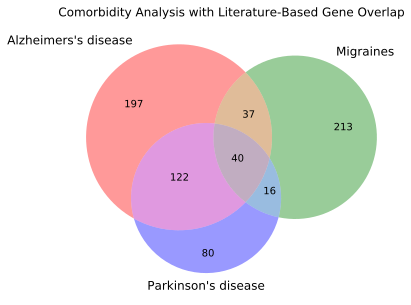

In [14]:
plt.figure(figsize=(6, 6))

v = venn3(
    [alzheimers_epilepsy_geneset.keys(), migraine_epilepsy_geneset.keys(), parkinsons_epilepsy_geneset.keys()],
    set_labels = ("Alzheimers's disease", 'Migraines', "Parkinson's disease")
)
plt.title("Comorbidity Analysis with Literature-Based Gene Overlap")
plt.show()

##### Distributions of the geneset relative entropies

Explanation about the calculation of relative entropies with the following equation can be found in:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3541249/

$Relative entropy (p_1, p_2) = p_1 * \log (\frac{p_1}{p_2})$

Where $p_1$ is the number of abstracts containing the entity in the query selected corpus and $p_2$ denotes the total number of documents in which the entity occurs within an unspecific reference corpus (i.e. the entire Medline). The Kullback–Leibler divergence ranks those entities high, which have especially high frequency in the selected corpus in comparison to the unspecific reference corpus. This means that frequently occurring entities do not receive high ranks. For example, using the query `"Alzheimer’s Disease" AND "Evidence marker" AND "Human Genes/Proteins"`, we retrieved 331 abstracts containing IL1B with a frequency ranking of 10. Conversely, according to the relative entropy formula, IL1B has an entropy rank of 34 despite its high occurrence in Medline (i.e. 40685 abstracts).

##### Check the distribution of relative entropies in each query

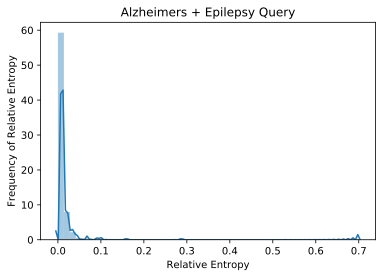

In [15]:
# Relative entropies as strings to integers
h = [
    entropy
    for entropy in map(float, alzheimers_epilepsy_geneset.values())
]

plt.title('Alzheimers + Epilepsy Query')
plt.xlabel('Relative Entropy')
plt.ylabel('Frequency of Relative Entropy')
sns.distplot(h)
plt.show()  